In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from skimage.morphology import skeletonize
from skimage.util import invert
import random




In [31]:
url = 'https://www.nobroker.in/blog/wp-content/uploads/2023/07/hairline-cracke.jpg'  # Replace with the actual image URL
response = requests.get(url)
img_arr = np.array(bytearray(response.content), dtype=np.uint8)


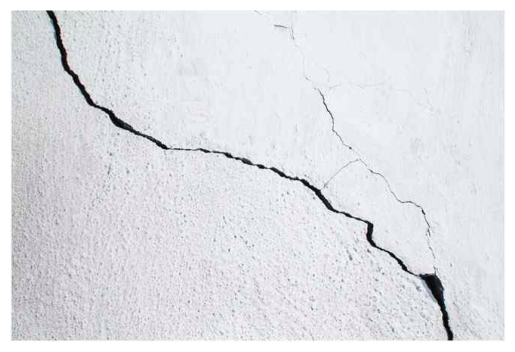

In [32]:
img = cv2.imdecode(img_arr, -1)
plt.axis('off')
plt.imshow(img)

[15.0, 20.19999999999999, 31.714285714285722, 17.5, 6.25, 10.166666666666686, 4.555555555555543, 0.5, 14.0, 117.57142857142856, 89.0, 112.5, 76.57142857142856, 10.5, 83.25, 106.89999999999998, 97.0, 30.0, 28.0, 0.28571428571433444, 24.5]
max width 117.57142857142856
mean  42.66500377928949


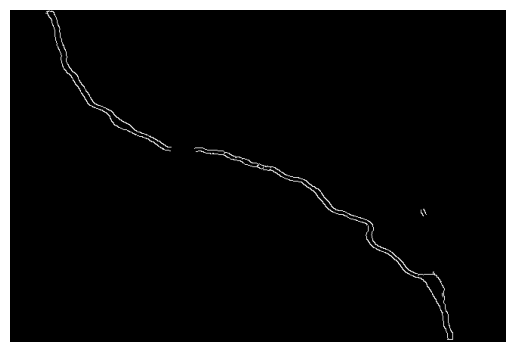

In [33]:
med_val = np.median(img)
lower = int(max(0, 0.7*med_val))
upper = int(min(255, 1.3*med_val))

blurred_img = cv2.blur(img, ksize=(5, 5))


edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper+ 50)

res , edges = cv2.threshold(edges, 127, 255, 0)



with_pixel_dis = []

for i in range(edges.shape[0]):
    row_pixels = []
    for j in range(edges.shape[1]):
        if edges[i][j] > 0:
            row_pixels.append(j)
    with_pixel_dis.append(row_pixels)

width = []
lengths = [len(inner_list) for inner_list in with_pixel_dis]
leng = np.array(lengths)

for i in with_pixel_dis:

    if len(i) > np.mean(leng):
        first = []
        last = []
        for k in range(len(i)):
            if i[k] + 1 in i or i[k] - 1 in i:
                first.append(i[k])
            else:
                last.append(i[k])

        # Convert lists to NumPy arrays
        first_array = np.array(first)
        last_array = np.array(last)

        # Calculate the mean only if the arrays are not empty
        if first_array.size > 0 and last_array.size > 0:
            width.append(abs(np.mean(first_array) - np.mean(last_array)))

width_array = np.array(width)

print(width)
print("max width",max(width) )
print( "mean ", np.mean(width_array) )

height_pixels = []

plt.axis('off')
plt.imshow(edges, cmap='gray')

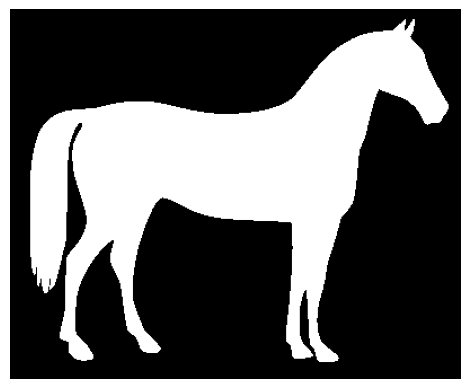

In [23]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)



plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

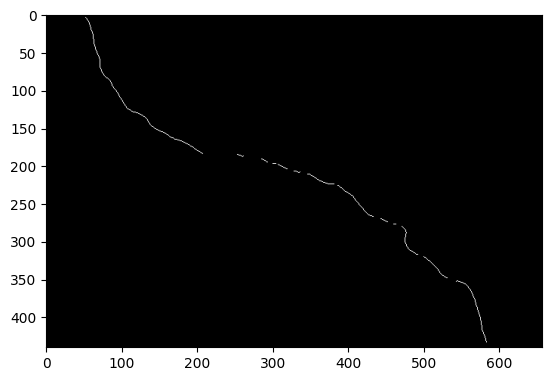

In [39]:

# Convert the image to grayscale
gray_image1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Use cv2.cvtColor instead of cv2.colorChange

bl2 = cv2.blur(gray_image1, ksize=(5,5))


res , bl = cv2.threshold( bl2 , 127, 255, 0)

bl = invert(bl)

skeleton = skeletonize(bl//255)
plt.imshow(skeleton, cmap='gray')

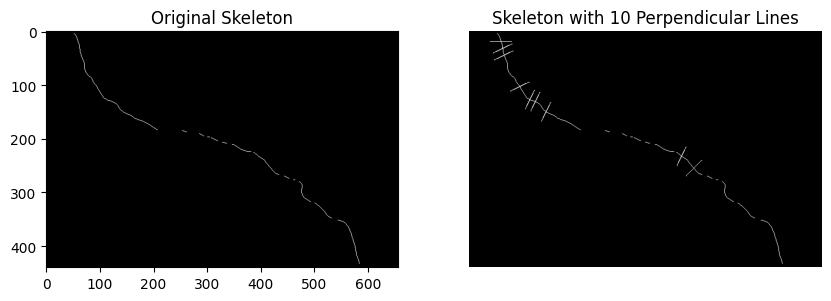

In [63]:


# Get the coordinates of the skeleton points
skeleton_points = np.column_stack(np.where(skeleton > 0))

# Set the number of perpendicular lines
num_perpendicular_lines = 10

# Create a copy of the skeleton to draw the perpendicular lines
skeleton_with_perpendicular = np.zeros_like(skeleton)  # Create a black image with the same shape as the skeleton
skeleton_with_perpendicular[skeleton > 0] = 1  # Keep the skeleton in the new image

for _ in range(num_perpendicular_lines):
    # Randomly select a point on the skeleton
    random_point = skeleton_points[random.randint(0, len(skeleton_points) - 1)]

    # Calculate the perpendicular line coordinates
    index = np.where((skeleton_points[:, 0] == random_point[0]) & (skeleton_points[:, 1] == random_point[1]))[0][0]
    prev_point = skeleton_points[index - 1] if index > 0 else random_point
    next_point = skeleton_points[index + 1] if index < len(skeleton_points) - 1 else random_point

    # Calculate the direction vector of the line segment
    direction_vector = (next_point[0] - prev_point[0], next_point[1] - prev_point[1])

    # Calculate the perpendicular vector (rotated 90 degrees)
    perpendicular_vector = (-direction_vector[1], direction_vector[0])

    # Normalize the perpendicular vector
    length = np.sqrt(perpendicular_vector[0]**2 + perpendicular_vector[1]**2)
    perpendicular_vector = (perpendicular_vector[0] / length, perpendicular_vector[1] / length)

    # Define the length of the perpendicular line
    perpendicular_length = 20

    # Calculate the endpoints of the perpendicular line
    start_perpendicular = (int(random_point[0] - perpendicular_length * perpendicular_vector[0]),
                           int(random_point[1] - perpendicular_length * perpendicular_vector[1]))

    end_perpendicular = (int(random_point[0] + perpendicular_length * perpendicular_vector[0]),
                        int(random_point[1] + perpendicular_length * perpendicular_vector[1]))

    # Draw the perpendicular line on the skeleton copy
    rr, cc = np.linspace(start_perpendicular[0], end_perpendicular[0], num=100).astype(int), \
             np.linspace(start_perpendicular[1], end_perpendicular[1], num=100).astype(int)

    for r, c in zip(rr, cc):
        if 0 <= r < skeleton_with_perpendicular.shape[0] and 0 <= c < skeleton_with_perpendicular.shape[1]:
            skeleton_with_perpendicular[r, c] = 1  # Draw the perpendicular line

# Display the skeleton and the image with the perpendicular lines
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(skeleton, cmap='gray')
plt.title('Original Skeleton')

plt.subplot(1, 2, 2)
plt.imshow(skeleton_with_perpendicular, cmap='gray')
plt.title(f'Skeleton with {num_perpendicular_lines} Perpendicular Lines')
plt.axis('off')  # Turn off axis labels
plt.show()

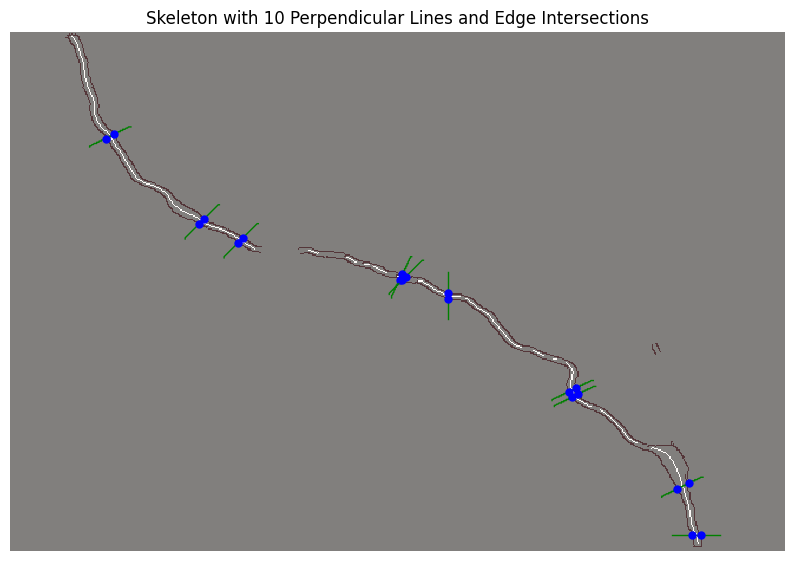

Distances where perpendicular lines cross edges (in pixels):
[7.211102550927978, 5.656854249492381, 5.385164807134504, 5.0, 8.06225774829855, 11.180339887498949, 7.0, 4.242640687119285, 5.656854249492381, 5.830951894845301]


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming 'skeleton' is the binary skeleton image and 'edges' is the binary edge image

# Set the number of perpendicular lines
num_perpendicular_lines = 10

# Get the coordinates of the skeleton points
skeleton_points = np.column_stack(np.where(skeleton > 0))

# Create a figure to visualize everything
plt.figure(figsize=(10, 10))

# Plot the skeleton in white
plt.imshow(skeleton, cmap='gray', interpolation='none', alpha=0.7)

# Overlay the edges in red
plt.imshow(edges, cmap='Reds', interpolation='none', alpha=0.3)

perpendicular_distances = []  # To store the distances for each perpendicular line

for _ in range(num_perpendicular_lines):
    # Randomly select a point on the skeleton (same as before)
    random_point = skeleton_points[random.randint(0, len(skeleton_points) - 1)]
    index = np.where((skeleton_points[:, 0] == random_point[0]) & (skeleton_points[:, 1] == random_point[1]))[0][0]
    prev_point = skeleton_points[index - 1] if index > 0 else random_point
    next_point = skeleton_points[index + 1] if index < len(skeleton_points) - 1 else random_point

    # Calculate the direction vector and the perpendicular vector (same as before)
    direction_vector = (next_point[0] - prev_point[0], next_point[1] - prev_point[1])
    perpendicular_vector = (-direction_vector[1], direction_vector[0])

    # Normalize the perpendicular vector (same as before)
    length = np.sqrt(perpendicular_vector[0]**2 + perpendicular_vector[1]**2)
    perpendicular_vector = (perpendicular_vector[0] / length, perpendicular_vector[1] / length)

    # Define the length of the perpendicular line (same as before)
    perpendicular_length = 20

    # Calculate the endpoints of the perpendicular line (same as before)
    start_perpendicular = (int(random_point[0] - perpendicular_length * perpendicular_vector[0]),
                           int(random_point[1] - perpendicular_length * perpendicular_vector[1]))

    end_perpendicular = (int(random_point[0] + perpendicular_length * perpendicular_vector[0]),
                         int(random_point[1] + perpendicular_length * perpendicular_vector[1]))

    # Get the coordinates of the perpendicular line
    rr, cc = np.linspace(start_perpendicular[0], end_perpendicular[0], num=100).astype(int), \
             np.linspace(start_perpendicular[1], end_perpendicular[1], num=100).astype(int)

    # Find where this line intersects with the edges image
    intersections = []
    for r, c in zip(rr, cc):
        if 0 <= r < edges.shape[0] and 0 <= c < edges.shape[1]:
            if edges[r, c] > 0:  # Check if the pixel belongs to an edge
                intersections.append((r, c))

    # Draw the perpendicular line in green
    plt.plot(cc, rr, color='green', linewidth=1)

    # If there are intersections, mark them and calculate the distance
    if len(intersections) >= 2:
        first_intersection = intersections[0]
        last_intersection = intersections[-1]
        
        # Plot intersection points
        plt.plot([first_intersection[1], last_intersection[1]], [first_intersection[0], last_intersection[0]],
                 'bo', markersize=5)  # Mark intersections with blue circles
        
        # Compute the distance between the first and last intersection in pixels
        distance = np.sqrt((last_intersection[0] - first_intersection[0])**2 + 
                           (last_intersection[1] - first_intersection[1])**2)
        perpendicular_distances.append(distance)
    else:
        # No intersections found, set distance to 0 for this perpendicular line
        perpendicular_distances.append(0)

# Title and axis adjustments
plt.title(f'Skeleton with {num_perpendicular_lines} Perpendicular Lines and Edge Intersections')
plt.axis('off')  # Turn off axis labels
plt.show()

# Print or process the distances for each perpendicular line
print("Distances where perpendicular lines cross edges (in pixels):")
print(perpendicular_distances)

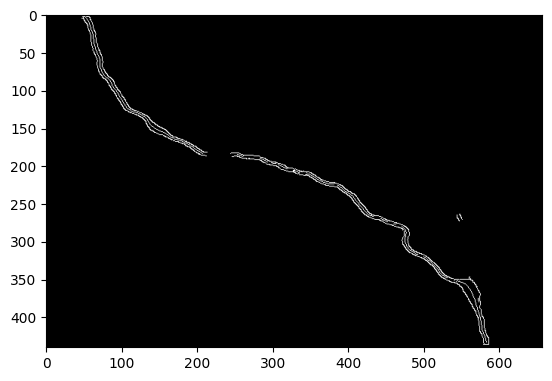

In [37]:
full = skeleton + edges

new_img = np.zeros(skeleton.shape, dtype=np.uint8)
new_img = np.where((skeleton > 0) | (edges > 0), 255, 0).astype(np.uint8)


plt.imshow(new_img, cmap='gray')


In [ ]:
#draw a perpendicular line for the skeleton
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        if skeleton[i][j] > 0:
            i1 = i
            j1 = j
            if edges[i][j+1] > 0:
                i2 = i
                j2 = j+1
                break


Widths: [2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 2, 2, 2, 2, 4, 3, 3, 3, 2, 2, 2, 2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 2, 2, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 4, 2, 2, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 2, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 4, 2, 3, 3, 3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 3, 3, 2, 4, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 3, 3, 2, 3, 3, 4, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 4, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 4, 2, 3, 3, 3, 2, 3, 2, 3

/var/folders/gh/ct0p90656djfbz1pmtmn05_r0000gn/T/ipykernel_67275/1121031455.py:45: RuntimeWarning: invalid value encountered in divide
  perp_vector = perp_vector / np.linalg.norm(perp_vector)  # Normalize
/var/folders/gh/ct0p90656djfbz1pmtmn05_r0000gn/T/ipykernel_67275/1121031455.py:55: RuntimeWarning: invalid value encountered in cast
  new_point = new_point.astype(int)


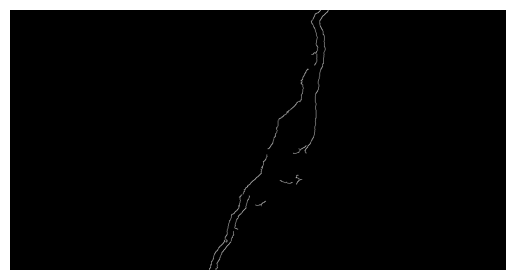

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# turn into grayscale

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Median calculation for adaptive Canny thresholds
med_val = np.median(img)
lower = int(max(0, 0.7 * med_val))
upper = int(min(255, 1.3 * med_val))

# Apply blur to reduce noise
blurred_img = cv2.blur(img, ksize=(5, 5))

# Edge detection using Canny
edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper + 50)

# Threshold to get binary image
_, edges = cv2.threshold(edges, 127, 255, 0)

# Skeletonize the edges to thin them down to a single-pixel width crack
skeleton = skeletonize(edges // 255).astype(np.uint8)

# Find contours of the crack skeleton
contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Function to calculate the perpendicular direction and width
def calculate_perpendicular_width(contour, edges):
    width_list = []
    
    for i in range(1, len(contour) - 1):
        # Get the current, previous, and next points
        p1 = contour[i - 1][0]
        p2 = contour[i][0]
        p3 = contour[i + 1][0]
        
        # Estimate the tangent (approximate local direction of the crack)
        tangent_vector = np.array([p3[0] - p1[0], p3[1] - p1[1]])
        
        # Perpendicular vector (rotate tangent by 90 degrees)
        perp_vector = np.array([-tangent_vector[1], tangent_vector[0]])
        perp_vector = perp_vector / np.linalg.norm(perp_vector)  # Normalize

        # Measure crack width by following the perpendicular direction
        length = 0
        max_length = 0
        for sign in [-1, 1]:  # Search in both directions (positive and negative)
            step = 0
            while True:
                # Calculate the new point along the perpendicular direction
                new_point = np.array(p2) + step * sign * perp_vector
                new_point = new_point.astype(int)
                
                # Check if the point is inside the image and part of the crack
                if (0 <= new_point[1] < edges.shape[0]) and (0 <= new_point[0] < edges.shape[1]):
                    if edges[new_point[1], new_point[0]] > 0:
                        length += 1
                    else:
                        break
                else:
                    break
                step += 1
            max_length = max(max_length, length)
        
        if max_length > 0:
            width_list.append(max_length)

    return width_list

# Iterate over all contours and measure crack width
widths = []
for contour in contours:
    widths += calculate_perpendicular_width(contour, edges)

# Convert widths to a numpy array
width_array = np.array(widths)

# Print the results
print("Widths:", widths)
print("Max width:", np.max(width_array))
print("Mean width:", np.mean(width_array))

# Plot the edges
plt.axis('off')
plt.imshow(edges, cmap='gray')
plt.show()



# Get the coordinates of the skeleton points
skeleton_points = np.column_stack(np.where(skeleton > 0))

# Set the number of perpendicular lines
num_perpendicular_lines = 10

# Create a copy of the skeleton to draw the perpendicular lines
skeleton_with_perpendicular = np.zeros_like(skeleton)  # Create a black image with the same shape as the skeleton
skeleton_with_perpendicular[skeleton > 0] = 1  # Keep the skeleton in the new image

for _ in range(num_perpendicular_lines):
    # Randomly select a point on the skeleton
    random_point = skeleton_points[random.randint(0, len(skeleton_points) - 1)]

    # Calculate the perpendicular line coordinates
    index = np.where((skeleton_points[:, 0] == random_point[0]) & (skeleton_points[:, 1] == random_point[1]))[0][0]
    prev_point = skeleton_points[index - 1] if index > 0 else random_point
    next_point = skeleton_points[index + 1] if index < len(skeleton_points) - 1 else random_point

    # Calculate the direction vector of the line segment
    direction_vector = (next_point[0] - prev_point[0], next_point[1] - prev_point[1])

    # Calculate the perpendicular vector (rotated 90 degrees)
    perpendicular_vector = (-direction_vector[1], direction_vector[0])

    # Normalize the perpendicular vector
    length = np.sqrt(perpendicular_vector[0]**2 + perpendicular_vector[1]**2)
    perpendicular_vector = (perpendicular_vector[0] / length, perpendicular_vector[1] / length)

    # Define the length of the perpendicular line
    perpendicular_length = 20

    # Calculate the endpoints of the perpendicular line
    start_perpendicular = (int(random_point[0] - perpendicular_length * perpendicular_vector[0]),
                           int(random_point[1] - perpendicular_length * perpendicular_vector[1]))

    end_perpendicular = (int(random_point[0] + perpendicular_length * perpendicular_vector[0]),
                        int(random_point[1] + perpendicular_length * perpendicular_vector[1]))

    # Draw the perpendicular line on the skeleton copy
    rr, cc = np.linspace(start_perpendicular[0], end_perpendicular[0], num=100).astype(int), \
             np.linspace(start_perpendicular[1], end_perpendicular[1], num=100).astype(int)

    for r, c in zip(rr, cc):
        if 0 <= r < skeleton_with_perpendicular.shape[0] and 0 <= c < skeleton_with_perpendicular.shape[1]:
            skeleton_with_perpendicular[r, c] = 1  # Draw the perpendicular line

# Display the skeleton and the image with the perpendicular lines
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(skeleton, cmap='gray')
plt.title('Original Skeleton')

plt.subplot(1, 2, 2)
plt.imshow(skeleton_with_perpendicular, cmap='gray')
plt.title(f'Skeleton with {num_perpendicular_lines} Perpendicular Lines')
plt.axis('off')  # Turn off axis labels
plt.show()